# Visualize, Evaluate and Compare Performance

## Table of Contents
- [1. Imports](#1-imports)
   - [1.1. Import Necessary Libraries](#11-import-necessary-libraries)
   - [1.2. Import Data](#12-import-data)
   
- [2. Visualizations](#2-visualizations)
   - [2.1. Intra-Run Analysis: Median Best Fitness](#21-Intra-Run-Analysis-(Median-Best-Fitness))
   - [2.2. Inter-Run Analysis: Stability of the combination](#22-inter-run-analysis-stability-of-the-combination)
   - [2.3. Between Experiments: Comparison of probabilities](#23-between-experiments-comparison-of-probabilities)
   - [2.4. Plotting all together (per Combination+Experiment)](#25-elitism-experiment-comparison-of-final-combination-with-and-without-elitism)
   

- [3. Statistical tests](#3-statistical-tests)

- [4. Elitism Experiment: Comparison of Final Combination with and without elitism](#4-elitism-experiment-comparison-of-final-combination-with-and-without-elitism)


## 1. Imports

### 1.1. Import Necessary Libraries

__`Step 1`__ Import necessary libraries.

In [1]:
import pandas as pd
from library.performance_analysis import *

### 1.2. Import Data

__`Step 2`__ Import the data from our runs.

In [3]:
df_exp1 = pd.read_csv('combination_search/final_results_exp1.csv')
df_exp2 = pd.read_csv('combination_search/final_results_exp2.csv')
df_exp3 = pd.read_csv('combination_search/final_results_exp3.csv')

## 2. Visualizations

### 2.1. Intra-Run Analysis: Median Best Fitness

__`Step 3`__ Plot the Median best fitness of each generation of each combination.

In [3]:
plot_ABF_MBF(df_exp1, exp_comb='1', metric='MBF')
plot_ABF_MBF(df_exp2, exp_comb='2', metric='MBF')
plot_ABF_MBF(df_exp3, exp_comb='3', metric='MBF')

### 2.2. Inter-Run Analysis: Stability of the combination

__`Step 4`__ Check ABF, STD and ABF/STD on all combinations to access stability.

In [4]:
get_abf_stats(df_exp1)[0]


Most Stable Comb: ('two_phase_shuffle_mutation', 'cyclic_crossover', 'tournament_selection')
Least Stable Comb: ('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')


,Combination,ABF,STD,ABF/STD,ABF^2/STD - ABF
0,"('block_rotation_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.278492,0.041743,30.627655,37.878720
1,"('block_rotation_mutation', 'cyclic_crossover', 'tournament_selection')",1.436627,0.030591,46.962975,66.031651
2,"('block_rotation_mutation', 'partially_mapped_crossover', 'linear_ranking_selection')",1.258933,0.044113,28.538627,34.669277
3,"('block_rotation_mutation', 'partially_mapped_crossover', 'tournament_selection')",1.609877,0.044517,36.163397,56.608744
4,"('semi_shuffle', 'cyclic_crossover', 'linear_ranking_selection')",1.242853,0.043635,28.483168,34.157529
5,"('semi_shuffle', 'cyclic_crossover', 'tournament_selection')",1.427883,0.025023,57.063875,80.052635
6,"('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')",1.256759,0.049787,25.242767,30.467324
7,"('semi_shuffle', 'partially_mapped_crossover', 'tournament_selection')",1.563082,0.049363,31.664938,47.931822
8,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.284225,0.029379,43.712327,54.852223
9,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'tournament_selection')",1.407412,0.023752,59.255029,81.988807


In [5]:
get_abf_stats(df_exp2)[0]

Most Stable Comb: ('block_rotation_mutation', 'cyclic_crossover', 'linear_ranking_selection')
Least Stable Comb: ('semi_shuffle', 'cyclic_crossover', 'linear_ranking_selection')


,Combination,ABF,STD,ABF/STD,ABF^2/STD - ABF
0,"('block_rotation_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.272783,0.021282,59.805109,74.846143
1,"('block_rotation_mutation', 'cyclic_crossover', 'tournament_selection')",1.394262,0.028393,49.105396,67.071542
2,"('block_rotation_mutation', 'partially_mapped_crossover', 'linear_ranking_selection')",1.272120,0.033075,38.461154,47.655095
3,"('block_rotation_mutation', 'partially_mapped_crossover', 'tournament_selection')",1.537450,0.033670,45.662073,68.665690
4,"('semi_shuffle', 'cyclic_crossover', 'linear_ranking_selection')",1.263792,0.048971,25.807187,31.351125
5,"('semi_shuffle', 'cyclic_crossover', 'tournament_selection')",1.467102,0.029891,49.081456,70.540417
6,"('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')",1.243384,0.039730,31.295865,37.669394
7,"('semi_shuffle', 'partially_mapped_crossover', 'tournament_selection')",1.620897,0.046539,34.828884,54.833125
8,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.303605,0.024813,52.538194,67.185430
9,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'tournament_selection')",1.362315,0.028431,47.916294,63.914755


In [6]:
get_abf_stats(df_exp3)[0]


Most Stable Comb: ('block_rotation_mutation', 'cyclic_crossover', 'tournament_selection')
Least Stable Comb: ('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')


,Combination,ABF,STD,ABF/STD,ABF^2/STD - ABF
0,"('block_rotation_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.252681,0.033109,37.835319,46.142892
1,"('block_rotation_mutation', 'cyclic_crossover', 'tournament_selection')",1.470405,0.024453,60.132431,86.948642
2,"('block_rotation_mutation', 'partially_mapped_crossover', 'linear_ranking_selection')",1.268954,0.038451,33.001957,40.609012
3,"('block_rotation_mutation', 'partially_mapped_crossover', 'tournament_selection')",1.618567,0.047021,34.422370,54.096335
4,"('semi_shuffle', 'cyclic_crossover', 'linear_ranking_selection')",1.246513,0.037457,33.278479,40.235544
5,"('semi_shuffle', 'cyclic_crossover', 'tournament_selection')",1.476043,0.029899,49.367011,71.391772
6,"('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')",1.243417,0.047452,26.203828,31.338868
7,"('semi_shuffle', 'partially_mapped_crossover', 'tournament_selection')",1.663101,0.056566,29.401202,47.234058
8,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.307608,0.045268,28.885799,36.463703
9,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'tournament_selection')",1.380277,0.035188,39.225393,52.761631


__`Step 5`__ Plot the best fitness of each run (for some combinations). Choosing to visualize the ones considered the best and least stable combination of each experiment.

In [7]:
plot_BF_inter_run_boxplot(df_exp1, exp_comb='1')
plot_BF_inter_run_boxplot(df_exp2, exp_comb='2')
plot_BF_inter_run_boxplot(df_exp3, exp_comb='3')

In [8]:
#only plot those of interest
plot_BF_inter_run(df_exp1, ['TCT', 'SPL'], '1')
plot_BF_inter_run(df_exp2, ['BPL', 'SPL'], '2')
plot_BF_inter_run(df_exp3, ['BCT', 'SPL'], '3')

Experience 2, using PMUT=0.2, seems to be the most disruptive in terms of stability.

### 2.3. Between Experiments: Comparison of probabilities

__`Step 6`__ Scatter the final results of each combination per experiment, and for each experiment by combination.


In [9]:
exp_bf_per_comb({'exp1': 'Probability of Mutation: 0.1', 'exp2': 'Probability of Mutation: 0.2', 'exp3': 'Probability of Mutation: Customized'})

This visualization also makes clear the higher fitness for those combinations that use tournament selection and partially mapped crossover. For these 3, with using block rotation or two-phase shuffle, lower probabilities worked the best; using semi-shuffle, the higher probability was the best performing one (0.3).

In [11]:
comb_bf_per_exp({'exp1': 'Probability of Mutation: 0.1', 'exp2': 'Probability of Mutation: 0.2', 'exp3': 'Probability of Mutation: Customized'})

We can see the fluctuation of a combination between experiments. The experiment 3, with the customized mutation probabilities, was the one that gave raise to the higher fitness (1.764), with the combination Semi-shuffle, Partially mapped and Tournament.

__`Step 7`__ For each combination, plot the different experiments (with different probabilities), along with standart deviation.

In [12]:
# Checking only the combinations that had the best fitness and most stability for each experiment

comb_between_exp(df_exps = {'exp1': 'Probability of Mutation: 0.1', 'exp2': 'Probability of Mutation: 0.2',
                            'exp3': 'Probability of Mutation: Customized'
                            }, comb_ids=['BPT', 'BPL'],
                            metric='MBF',
                            std=True
                            )#,'TPT', 'SPT', 'BPL', 'TPL', 'SPL'])

### 2.4. Plotting all together (per Combination+Experiment)

__`Step 8`__ By selecting x best combinations of each experiment, plot them all together, so we can have a full picture of combinations and their experiment (where it was only changed probabilities).

In [13]:
plot_Xbest_per_exp(Xbest=2, df_exps={'exp1': 'Prob Mut 0.1', 'exp2': 'Prob Mut 0.2', 'exp3': 'Customized Prob Muts'}, std=True)

In [45]:
plot_Xbest_per_exp_box(Xbest=3, metric='ABF',
                       df_exps={'exp1': 'Prob Mut 0.1', 'exp2': 'Prob Mut 0.2', 'exp3': 'Customized Prob Muts'})

## 3. Statistical tests

### Effect of different probabilities in mutations

- #### Semi-shuffle:

In [46]:
S_combs = [('SPT', 'exp1'), ('SPT', 'exp2'), ('SPT', 'exp3')]

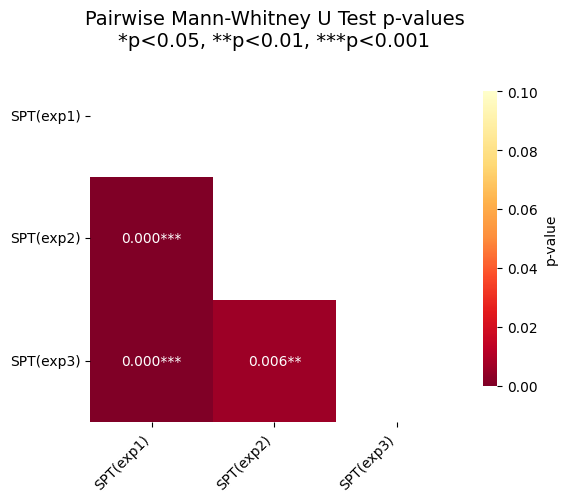

In [47]:
_ = pairwise_mannwhitney(S_combs, alpha=0.05)

- #### Block-rotation:

In [48]:
B_combs = [('BPT', 'exp1'), ('BPT', 'exp2'), ('BPT', 'exp3')]

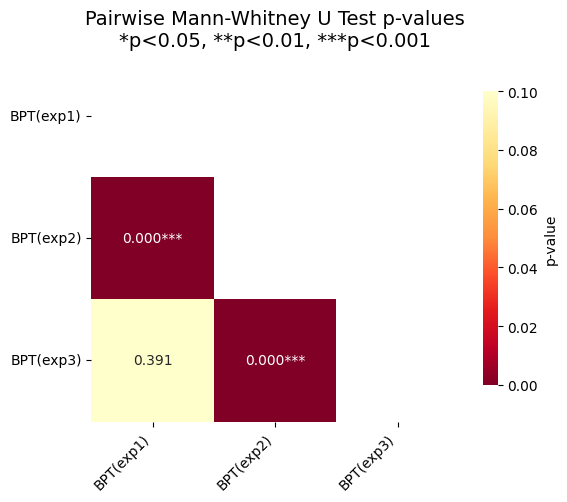

In [49]:
_ = pairwise_mannwhitney(B_combs, alpha=0.05)

- #### Two-phase shuffle:

In [50]:
T_combs = [('TPT', 'exp1'), ('TPT', 'exp2'), ('TPT', 'exp3')]

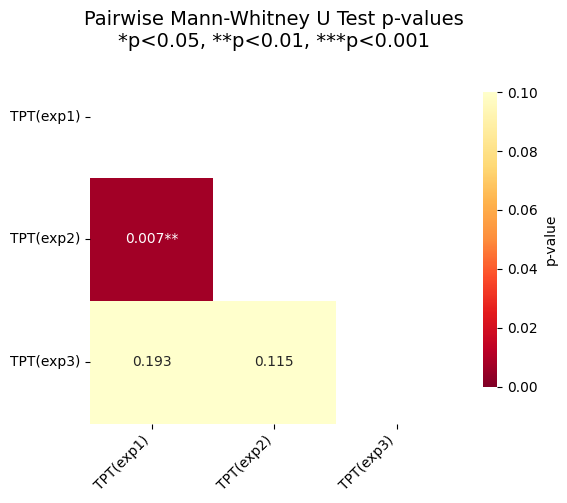

In [51]:
_ = pairwise_mannwhitney(T_combs, alpha=0.05)

### Top 4 Best combinations

In [52]:
# TOP 4
best_comb = [('SPT', 'exp3'), ('SPT', 'exp2'), ('BPT', 'exp3'), ('BPT', 'exp1')]

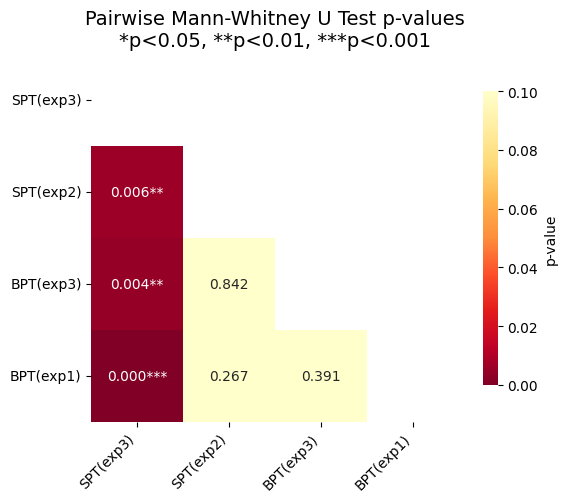

In [53]:
_ = pairwise_mannwhitney(best_comb, alpha=0.05)

## 4. Elitism Experiment: Comparison of Final Combination with and without elitism

 For the final combination, plot the best fitness per generation with and without the result.

In [54]:
df_elitism_1 = pd.read_csv('combination_search/elitism_exp1.csv')
df_elitism_2 = pd.read_csv('combination_search/elitism_exp2.csv')

In [55]:
elitism_tuning_plot(df_elitism_1)

In [56]:
plot_ABF_MBF(df_elitism_1, 'MBF', comb_col='Elitism', std=True)

In [57]:
perform_elitism_mannwhitneyu_test(df_elitism_1)


Mann-Whitney U Test: Elitism (True vs. False) - Generation 100
--------------------------------------------------------------
  U statistic                        : 708.5
  P-value                            : 0.3812
  Median Fitness (with Elitism)      : 1.70069
  Median Fitness (without Elitism)   : 1.71927
  Significant difference (α=0.05)    : No
--------------------------------------------------------------



- To get a better perspective if this statistical non significance is due to the problem it self of the choice of mutation use, we ran one last comparison of the our second best combination that used another mutation operator, more specificaly the block rotation.  

In [58]:
elitism_tuning_plot(df_elitism_2)

In [59]:
plot_ABF_MBF(df_elitism_2, 'MBF', comb_col='Elitism', std=True)

In [60]:
perform_elitism_mannwhitneyu_test(df_elitism_2)


Mann-Whitney U Test: Elitism (True vs. False) - Generation 100
--------------------------------------------------------------
  U statistic                        : 1460.0
  P-value                            : 2.209e-10
  Median Fitness (with Elitism)      : 1.69462
  Median Fitness (without Elitism)   : 1.59596
  Significant difference (α=0.05)    : Yes
--------------------------------------------------------------

